# Project 1
## Covid 19

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import requests
import json
from config import gkey
from pprint import pprint
import random
import time
import os
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import stats
import scipy.stats as st
from scipy.stats import linregress
import gmaps

%matplotlib inline
from matplotlib import pyplot as plt
import scipy.stats as stats


In [3]:
file_path = "Resources/time_series_covid_19_confirmed.csv"
confirmed_df = pd.read_csv(file_path)
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37856,37894,37953,37999,38054,38070,38113,38129,38140,38143
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,7967,8119,8275,8427,8605,8759,8927,9083,9195,9279
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40258,40667,41068,41460,41858,42228,42619,43016,43403,43781
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1024,1045,1045,1045,1060,1060,1098,1098,1124,1124
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2044,2068,2134,2171,2222,2283,2332,2415,2471,2551


In [4]:
confirmed_df["Type"] = "world"
confirmed_df.head()


,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20,Type
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,37894,37953,37999,38054,38070,38113,38129,38140,38143,world
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,8119,8275,8427,8605,8759,8927,9083,9195,9279,world
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,40667,41068,41460,41858,42228,42619,43016,43403,43781,world
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,1045,1045,1045,1060,1060,1098,1098,1124,1124,world
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,2068,2134,2171,2222,2283,2332,2415,2471,2551,world


In [5]:
#confirmed_df["Row Total"] = confirmed_df.iloc[:, 4:].sum(axis=1)
confirmed_df["8/29/20"].sum()


24996456

In [6]:
world_df = confirmed_df.groupby(["Type"])
world_df.sum()

world_group_df = pd.DataFrame(world_df.sum())
world_group_df

dates_df = world_group_df.drop(["Lat", "Long"], axis = 1)
dates_df


,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,...,8/20/20,8/21/20,8/22/20,8/23/20,8/24/20,8/25/20,8/26/20,8/27/20,8/28/20,8/29/20
Type,,,,,,,,,,,,,,,,,,,,,
world,555,654,941,1434,2118,2927,5578,6166,8234,9926,...,22675329,22946050,23200536,23417487,23643821,23885837,24173588,24452689,24734448,24996456


In [7]:
dates_transpose_df = dates_df.transpose()
dates_transpose_df

new_index_df = dates_transpose_df.reset_index(drop= False)
new_index_df["index"].astype(str)
new_index_df

new_index_df = new_index_df.rename(columns = {"index":"Date"})
new_index_df


Type,Date,world
0,1/22/20,555
1,1/23/20,654
2,1/24/20,941
3,1/25/20,1434
4,1/26/20,2118
...,...,...
216,8/25/20,23885837
217,8/26/20,24173588
218,8/27/20,24452689
219,8/28/20,24734448


In [8]:
new_index_df
new_index_df.to_csv("Output/world_data.csv", index= False, header= True)


In [9]:
path = "Resources/world_data.csv"
world_data_df = pd.read_csv(path)
world_data_df


,index,Cumulative,Month,Section
0,1/22/20,0,Jan,Second Jan
1,1/23/20,99,Jan,Second Jan
2,1/24/20,287,Jan,Second Jan
3,1/25/20,493,Jan,Second Jan
4,1/26/20,684,Jan,Second Jan
...,...,...,...,...
216,8/25/20,242016,Aug,Second Aug
217,8/26/20,287751,Aug,Second Aug
218,8/27/20,279101,Aug,Second Aug
219,8/28/20,281759,Aug,Second Aug


In [10]:
high_count_df = confirmed_df[["Country/Region", "8/29/20"]]
high_count_df.sort_values("8/29/20", ascending= False).reset_index(drop= True).head(10)


,Country/Region,8/29/20
0,US,5961094
1,Brazil,3846153
2,India,3542733
3,Russia,982573
4,Peru,629961
5,South Africa,622551
6,Colombia,599884
7,Mexico,591712
8,Spain,439286
9,Chile,408009


<function matplotlib.pyplot.show(*args, **kw)>

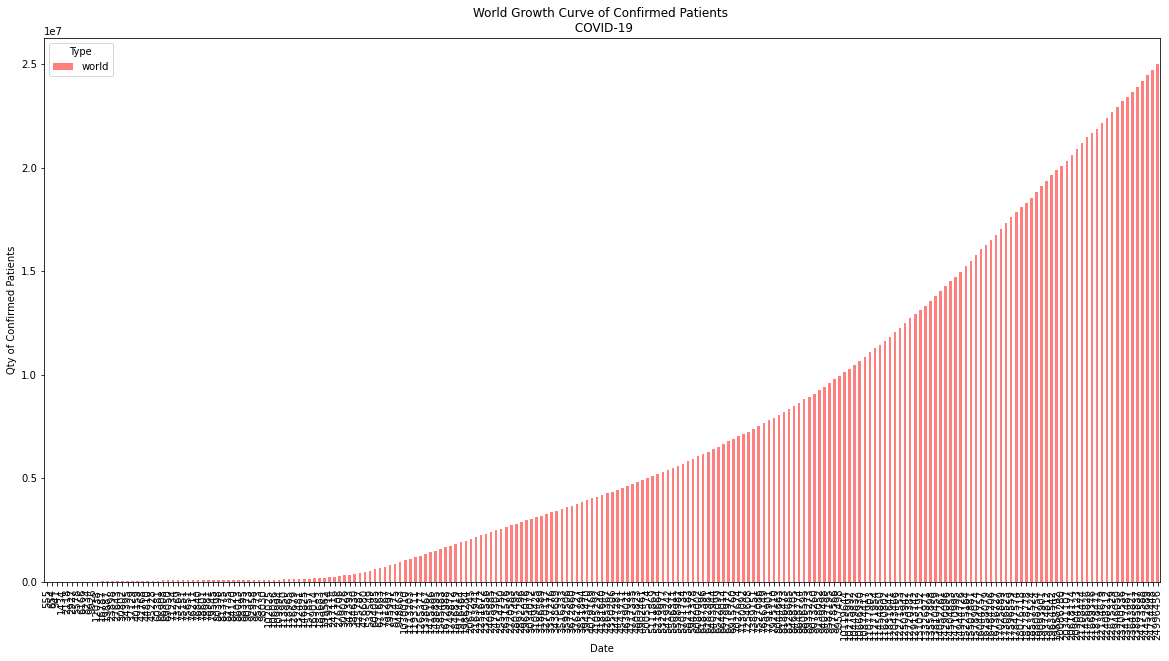

In [11]:
#Generate a bar chart
tick_location = new_index_df.index.values

new_index_df.plot(kind="bar", figsize=(20,10), color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location, new_index_df["world"], rotation="vertical")
plt.title("World Growth Curve of Confirmed Patients \n COVID-19")
plt.xlabel("Date")
plt.ylabel("Qty of Confirmed Patients")
plt.savefig("Images/world_growth_curve.png")
plt.show


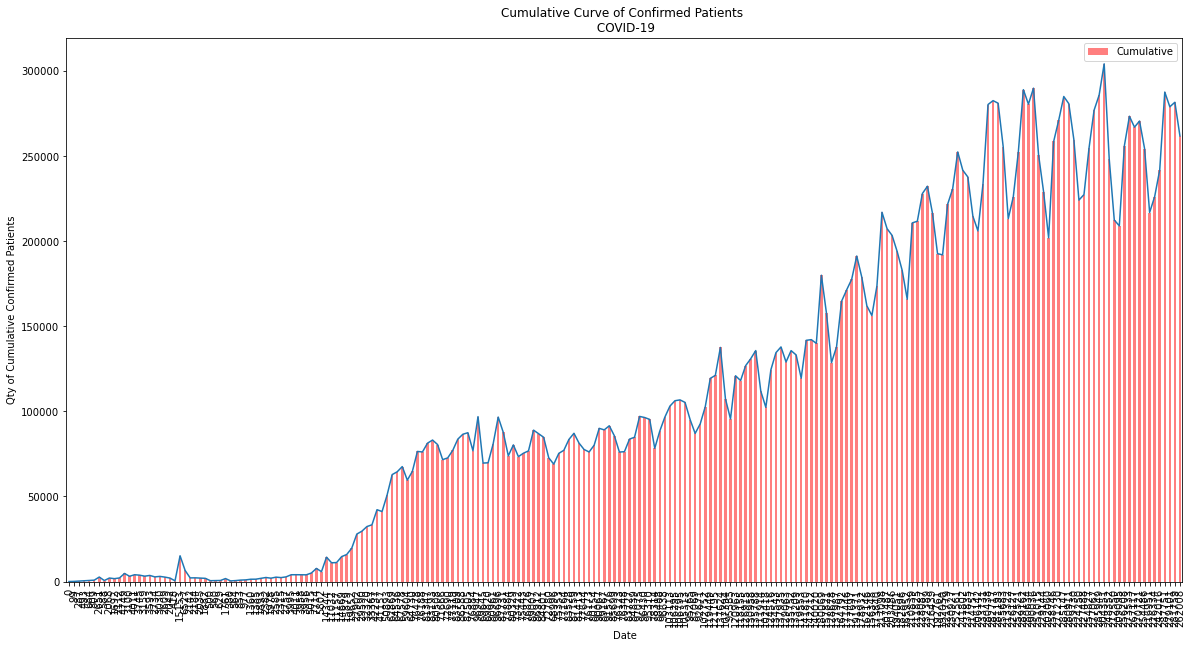

In [12]:
#Generate a bar chart "Cumulative"
tick_location1 = world_data_df.index.values

world_data_df.plot(kind="bar", figsize=(20,10), color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location1, world_data_df["Cumulative"], rotation="vertical")
plt.title("Cumulative Curve of Confirmed Patients \n COVID-19")
plt.xlabel("Date")
plt.ylabel("Qty of Cumulative Confirmed Patients")
plt.plot(tick_location1, world_data_df["Cumulative"])
plt.savefig("Images/world_cumulative_curve.png")
plt.show()


In [13]:
jul_aug_df = world_data_df.loc[(world_data_df["Month"]== "Jul") | (world_data_df["Month"]== "Aug"), :]
new_df = jul_aug_df.reset_index(drop= True)
new_df


,index,Cumulative,Month,Section
0,07/01/20,217098,Jul,First Jul
1,07/02/20,207487,Jul,First Jul
2,07/03/20,203486,Jul,First Jul
3,07/04/20,194051,Jul,First Jul
4,07/05/20,182896,Jul,First Jul
5,07/06/20,165952,Jul,First Jul
6,07/07/20,210839,Jul,First Jul
7,07/08/20,211825,Jul,First Jul
8,07/09/20,228087,Jul,First Jul
9,07/10/20,232389,Jul,First Jul


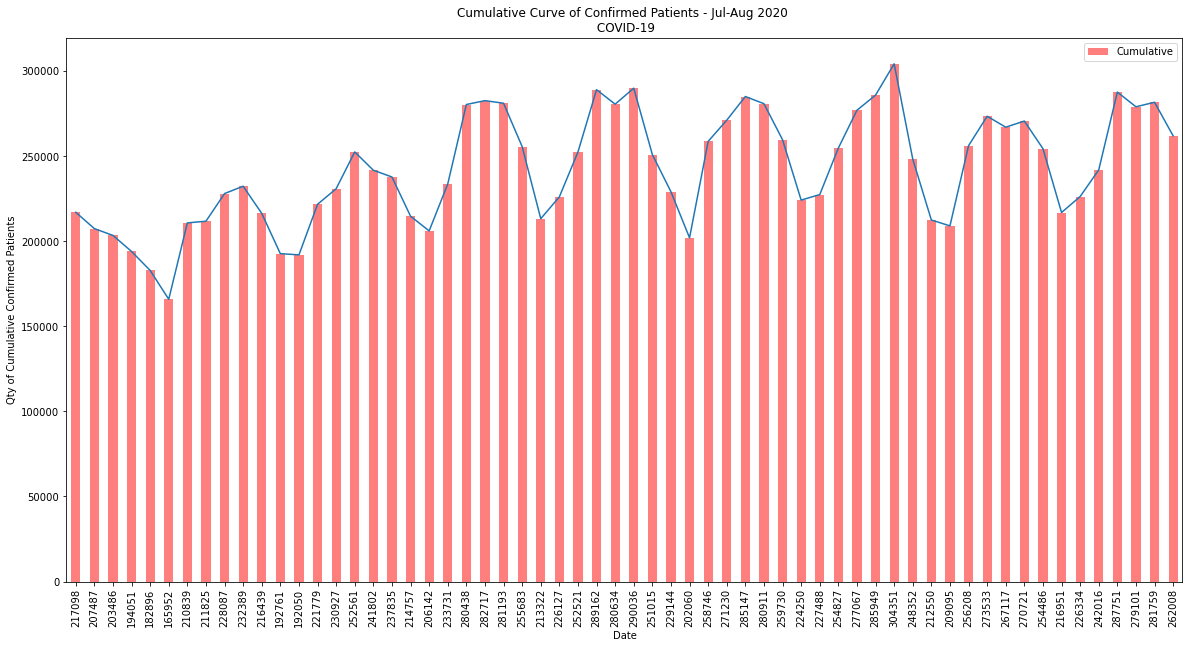

In [14]:
#Generate a bar chart "Cumulative"
tick_location2 = new_df.index.values

new_df.plot(kind="bar", figsize=(20,10), color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location2, new_df["Cumulative"], rotation="vertical")
plt.title("Cumulative Curve of Confirmed Patients - Jul-Aug 2020 \n COVID-19")
plt.xlabel("Date")
plt.ylabel("Qty of Cumulative Confirmed Patients")
plt.plot(tick_location2, new_df["Cumulative"])
plt.savefig("Images/jul_aug_cumulative_curve.png")
plt.show()


In [15]:
# Generate some fake data to test with
def gendata(loc=0):

    pop = new_df.loc[new_df["Month"]== "Jul", :]
    population = pop["Cumulative"]
    
    sam = new_df.loc[new_df["Month"]== "Aug", :]
    sample = sam["Cumulative"]

    # Scatter Plot of Data
    plt.subplot(2, 1, 1)
    plt.scatter(range(len(population)), population, label="July")
    plt.scatter(range(len(sample)), sample, label="August")
    plt.legend()

    # Histogram Plot of Data
    plt.subplot(2, 1, 2)
    plt.hist(population, 20, density=True, alpha=0.7, label="July")
    plt.hist(sample, 20, density=True, alpha=0.7, label="August")
    plt.axvline(population.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.axvline(sample.mean(), color='k', linestyle='dashed', linewidth=1)
    plt.legend()  
    
    return population, sample


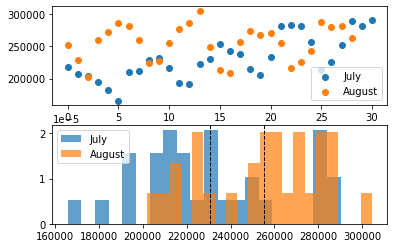

In [16]:
# Generate some data and show the scatter plot
population, sample = gendata()


In [17]:
#Generate a histogram
bins = [-70, -59.90, -49.9, -39.9, -29.9, -19.9, -9.9, 0, 9.9, 19.9, 29.9, 39.9, 49.9, 59.9, 70]
groups_names = ["-70", "-60", "-50", "-40", "-30", "-20", "-10", "10", "20", "30", "40", "50", "60", "70"]

confirmed_df["Count Summary"] = pd.cut(confirmed_df["Lat"], bins, labels= groups_names, include_lowest= True)
confirmed_df

lat_confirmed = confirmed_df.groupby("Count Summary")
lat_confirmed.sum()

lat_group_df = pd.DataFrame(lat_confirmed.sum())
lat_group_df

lat_group_df = lat_group_df[["8/29/20"]]
new_lat_group_df = lat_group_df.reset_index(drop= False)
new_lat_group_df


new_lat_group_df = new_lat_group_df.rename(columns = {"Count Summary":"Latitude"})
new_lat_group_df


,Latitude,8/29/20
0,-70,0
1,-60,13
2,-50,1959
3,-40,1457655
4,-30,33769
5,-20,4010712
6,-10,974494
7,10,1077435
8,20,551881
9,30,5383998


<function matplotlib.pyplot.show(*args, **kw)>

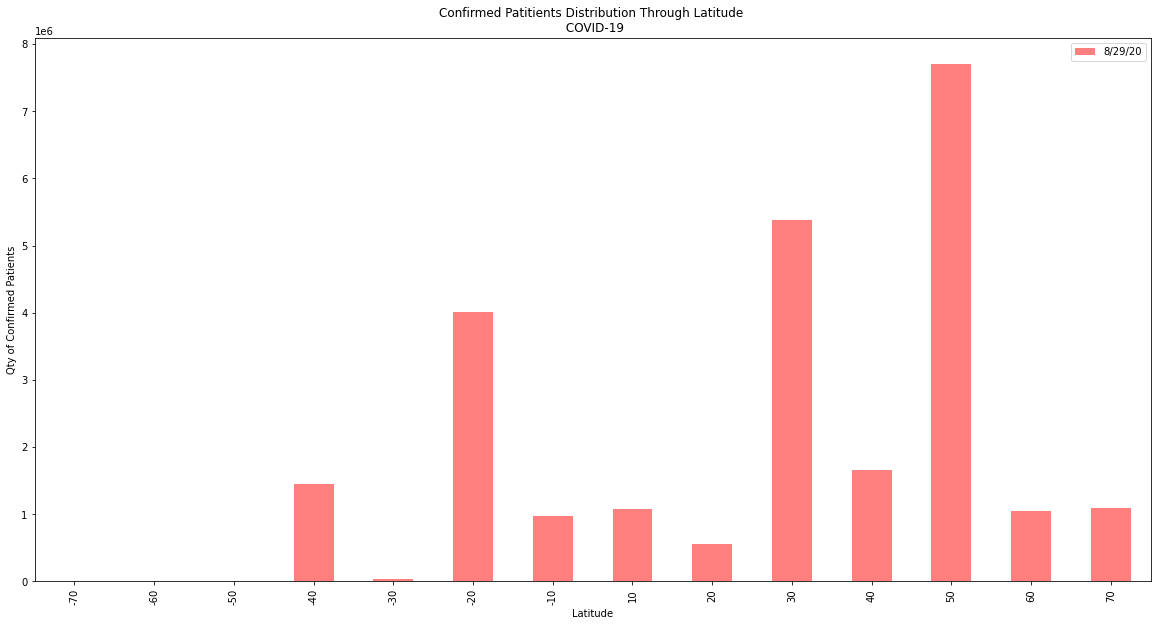

In [18]:
#Generate a bar chart
tick_location = new_lat_group_df.index.values

new_lat_group_df.plot(kind="bar", figsize=(20,10), color="r", alpha = 0.5, align = "center")
plt.xticks(tick_location, new_lat_group_df["Latitude"], rotation="vertical")
plt.title("Confirmed Patitients Distribution Through Latitude \n COVID-19")
plt.xlabel("Latitude")
plt.ylabel("Qty of Confirmed Patients")
plt.savefig("Images/latitude_curve.png")
plt.show


In [19]:
# Calculate the sample mean for July 2020
sample1 = world_data_df[world_data_df["Month"] == "Jul"]
sample1.Cumulative.mean()


230539.5806451613

In [20]:
# Calculate the sample mean for Aug 2020
sample2 = world_data_df[world_data_df["Month"] == "Aug"]
sample2.Cumulative.mean()

255168.8620689655

In [21]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(sample1.Cumulative, sample2.Cumulative, equal_var=False)

Ttest_indResult(statistic=-3.1503734808670623, pvalue=0.002599358012048793)

In [22]:
# Calculate the sample mean for First Aug 2020
sample3 = world_data_df[world_data_df["Section"] == "First Aug"]
sample3.Cumulative.mean()

257351.13333333333

In [23]:
# Calculate the sample mean for First Aug 2020
sample4 = world_data_df[world_data_df["Section"] == "Second Aug"]
sample4.Cumulative.mean()

252830.7142857143

In [24]:
# Calculate Independent (Two Sample) T-Test
stats.ttest_ind(sample3.Cumulative, sample4.Cumulative, equal_var=False)

Ttest_indResult(statistic=0.44364323277444, pvalue=0.6608401002548074)

In [25]:
# Access maps with unique API key
gmaps.configure(api_key=gkey)

# Store latitude and longitude in locations
locations = confirmed_df[["Lat", "Long"]]

# Store humidity in weight
weights = confirmed_df["8/29/20"].astype(float)

# Plot Heatmap
fig = gmaps.figure()

# Create heat layer
heat_layer = gmaps.heatmap_layer(locations, weights, 
                                 dissipating=False, max_intensity= 100000,
                                 point_radius=3)

# Add layer
fig.add_layer(heat_layer)

# Display figure
fig

Figure(layout=FigureLayout(height='420px'))